In [2]:
from scipy.integrate import quad
import numpy as np
from scipy.integrate import odeint
from matplotlib import rcParams
import matplotlib.pyplot as plt
from matplotlib import rcParams
import scipy.integrate as spi
from scipy.integrate import solve_ivp
from scipy import integrate
import matplotlib.ticker
from PRaccretion import*
import math
plt.rcParams.update({
  "text.usetex": True,
  "font.family": "serif"
})


# Plot of λ(z) vs z,  given by Eq.(2) in De Luca et al. 
# https://arxiv.org/abs/2003.12589

# Here, c_s(z) is given by Eq.(2.5) of https://arxiv.org/abs/2003.02778
# and v_rel is given by Eq.(7) in Vivianet al. https://arxiv.org/abs/1707.04206

# Here, we don't consider the presence of DM spike around the isolated PBH.

def c_s(z):
    return c_s_Ricotti(z)

def v_pbh(z):
    return v_rel_digitized_Ricotti(z)

def v_eff(z):
    return v_eff_Ricotti(z)


def x_e(z):
    if z < z_rec:
        return e_fraction
    else:
        return 1
    
    
    
def β_cap(z, m):
        return 1e-4 * m * (((1+z)/1000)**(3/2)) * (((5.74e3 * (yr/pc))/v_eff(z))**3) * (0.257 + 1.45 * (x_e(z)/0.01) * (((1+z)/1000)**(5/2)))

    
def λ(z, m):
    def x_cr(z, m):
        return (-1 + np.sqrt(1 + β_cap(z, m)))/β_cap(z, m) 
    return np.exp((9/2)/(3 + β_cap(z, m)**(0.75))) * (x_cr(z, m)**2)

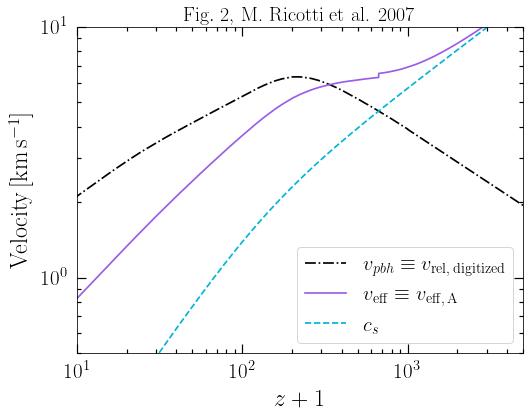

In [6]:
fig,ax = plt.subplots(1, figsize = (8, 6))
plt.rc('lines', linewidth = 1.7)
plt.rcParams['font.family'] = 'serif'
plt.tick_params(axis = 'both', right=True, top=True, which = 'minor', width= 1.2, length = 4, direction = 'in')
plt.tick_params(axis = 'both', right=True, top=True, which = 'major', width= 1.2, length = 9, direction = 'in')


z_array = np.geomspace(1, 1e4, 10000)
cs_array = np.zeros(len(z_array))
v_eff_array = np.zeros(len(z_array))
v_pbh_digitized_array = np.zeros(len(z_array))



for i, z in enumerate(z_array):
    cs_array[i] = c_s(z) * (pc/yr) * 1e-3 
    v_eff_array[i] = v_eff(z) * (pc/yr) * 1e-3 
    v_pbh_digitized_array[i] = v_pbh(z) * (pc/yr) * 1e-3 
    

ax.loglog(z_array, v_pbh_digitized_array, 'k', ls = '-.') 
ax.loglog(z_array, v_eff_array, '#9b5de5')
ax.loglog(z_array, cs_array, '#00b4d8', ls = '--')



ax.tick_params(axis='x', pad = 9.9)
ax.tick_params(axis='y', pad = 9.9)


plt.ylim(0.5, 10)
plt.xlim(10, 5000)

plt.legend([r'$v_{pbh} \equiv v_\mathrm{rel,\, digitized}$', r'$v_\mathrm{eff} \equiv v_\mathrm{eff, \, A}$', '$c_{s}$'],
           title_fontsize = 12, loc = 'lower right', prop = {"size":20.5})



plt.ylabel(r"Velocity$\, \mathrm{[km \,s^{-1}}]$ ", fontsize = 24, labelpad = 8)
plt.xlabel(r"$z + 1$", fontsize = 24, labelpad = 8)
plt.xticks(fontsize = 21)
plt.yticks(fontsize = 21)
plt.title('Fig$.~2$, M. Ricotti et al. 2007', fontsize = 20, pad = 6)
plt.savefig('velocities.pdf', bbox_inches = 'tight')
plt.show()

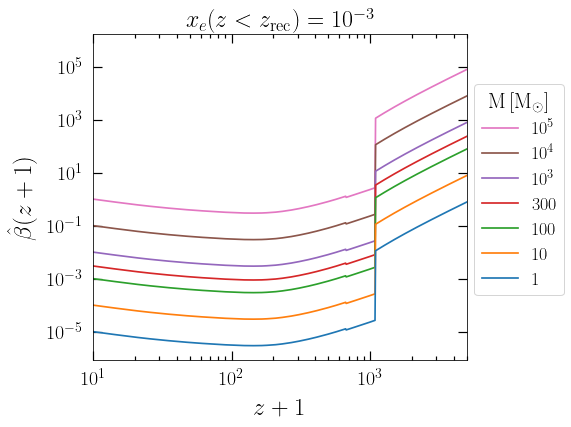

In [7]:
colors = ['C6', 'C5','C4','C3','C2', 'C1', 'C0']
fig,ax = plt.subplots(1, figsize = (6.7, 6))
plt.rc('lines', linewidth = 1.7)
plt.rcParams['font.family'] = 'serif'
plt.tick_params(axis = 'both', right=True, top=True, which = 'minor', width= 1.2, length = 4, direction = 'in')
plt.tick_params(axis = 'both', right=True, top=True, which = 'major', width= 1.2, length = 9, direction = 'in')



mi_arr = np.array([1e5, 1e4, 1000, 300, 100, 10, 1])
z_array = np.geomspace(1, 1e4, 1000)
β_cap_array = np.zeros(len(z_array))


for i, (m, color) in enumerate(zip(mi_arr, colors)):
    for i, z in enumerate(z_array):
        e_fraction = 1e-3
        β_cap_array[i] = β_cap(z, m)
    ax.loglog(z_array, β_cap_array, color = color)
    


ax.tick_params(axis='x', pad = 9.9)
ax.tick_params(axis='y', pad = 9.9)
plt.xlim(10, 5000)

plt.xlabel('$z+1$',  fontsize = 24.5, labelpad = 10)
plt.ylabel(r'$\hat \beta(z+1)$', fontsize = 25, labelpad = 10)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(['$10^{5}$' ,  '$10^{4}$', '$10^{3}$', '$300$','$100$', '$10$','$1$']
                     , title = '$ \mathrm{M\, [M_{\odot}]}$',
           title_fontsize = 21, loc = (1.02, 0.2), prop = {"size":18})
plt.title('$x_{e}(z < z_\mathrm{rec}) = 10^{-3}$', fontsize = 24, pad = 8)
plt.savefig('βvsz_xe1e-3.pdf', bbox_inches = 'tight')
plt.show()

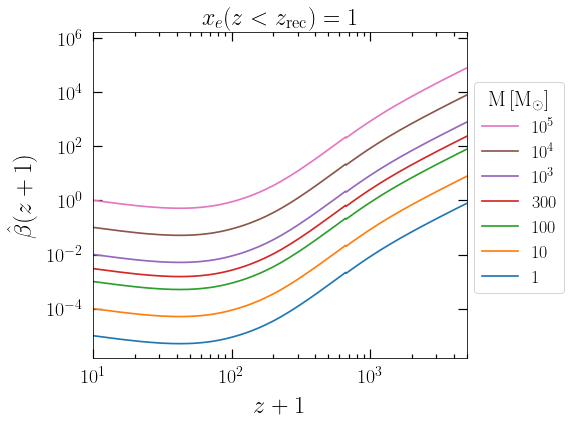

In [8]:
colors = ['C6', 'C5','C4','C3','C2', 'C1', 'C0']
fig,ax = plt.subplots(1, figsize = (6.7, 6))
plt.rc('lines', linewidth = 1.7)
plt.rcParams['font.family'] = 'serif'
plt.tick_params(axis = 'both', right=True, top=True, which = 'minor', width= 1.2, length = 4, direction = 'in')
plt.tick_params(axis = 'both', right=True, top=True, which = 'major', width= 1.2, length = 9, direction = 'in')



mi_arr = np.array([1e5, 1e4, 1000, 300, 100, 10, 1])
z_array = np.geomspace(1, 1e4, 1000)
β_cap_array = np.zeros(len(z_array))


for i, (m, color) in enumerate(zip(mi_arr, colors)):
    for i, z in enumerate(z_array):
        e_fraction = 1
        β_cap_array[i] = β_cap(z, m)
    ax.loglog(z_array, β_cap_array, color = color)
    


ax.tick_params(axis='x', pad = 9.9)
ax.tick_params(axis='y', pad = 9.9)
plt.xlim(10, 5000)

plt.xlabel('$z+1$',  fontsize = 24.5, labelpad = 10)
plt.ylabel(r'$\hat \beta(z+1)$', fontsize = 25, labelpad = 10)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(['$10^{5}$' ,  '$10^{4}$', '$10^{3}$', '$300$','$100$', '$10$','$1$']
                     , title = '$ \mathrm{M\, [M_{\odot}]}$',
           title_fontsize = 21, loc = (1.02, 0.2), prop = {"size":18})
plt.title('$x_{e}(z < z_\mathrm{rec}) = 1$', fontsize = 24, pad = 8)
plt.savefig('βvsz_xe1.pdf', bbox_inches = 'tight')
plt.show()

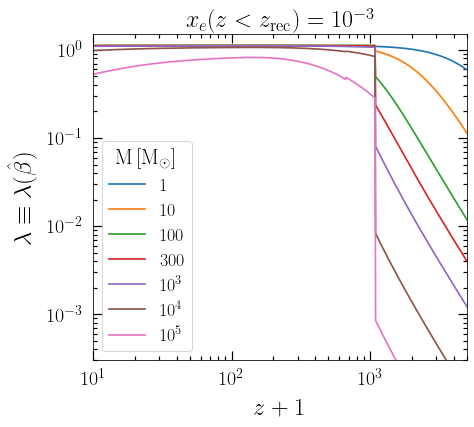

In [9]:
colors = ['C0', 'C1','C2','C3','C4', 'C5', 'C6']
fig,ax = plt.subplots(1, figsize = (6.7, 6))
plt.rc('lines', linewidth = 1.7)
plt.rcParams['font.family'] = 'serif'
plt.tick_params(axis = 'both', right=True, top=True, which = 'minor', width= 1.2, length = 4, direction = 'in')
plt.tick_params(axis = 'both', right=True, top=True, which = 'major', width= 1.2, length = 9, direction = 'in')


mi_arr = np.array([1, 10, 100, 300, 1e3, 1e4, 1e5])
z_array = np.geomspace(1, 1e4, 1000)
λ_array = np.zeros(len(z_array))


for i, (m, color) in enumerate(zip(mi_arr, colors)):
    for i, z in enumerate(z_array):
        e_fraction = 1e-3
        λ_array[i] = λ(z, m)
    ax.loglog(z_array, λ_array, color = color)
    


ax.tick_params(axis='x', pad = 9.9)
ax.tick_params(axis='y', pad = 9.9)
plt.xlim(10, 5000)
plt.ylim(3e-4, 1.5)
plt.xlabel('$z+1$',  fontsize = 24.5, labelpad = 10)
plt.ylabel(r'$\lambda \equiv \lambda(\hat \beta)$', fontsize = 25, labelpad = 10)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(['$1$' ,  '$10$', '$100$', '$300$','$10^{3}$', '$10^{4}$','$10^{5}$']
                     , title = '$ \mathrm{M\, [M_{\odot}]}$',
           title_fontsize = 21, loc = 'lower left', prop = {"size":18})
plt.title('$x_{e}(z < z_\mathrm{rec}) = 10^{-3}$', fontsize = 24, pad = 8)
plt.savefig('λvsz_xe1e-3.pdf', bbox_inches = 'tight')
plt.show()

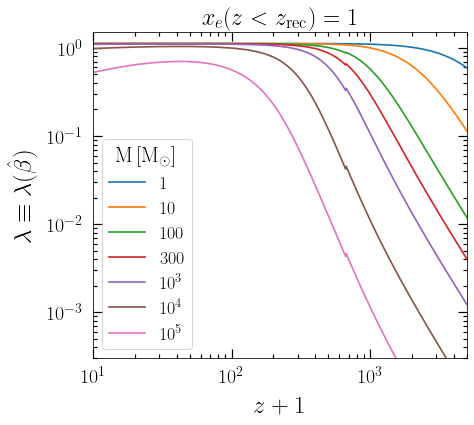

In [10]:
colors = ['C0', 'C1','C2','C3','C4', 'C5', 'C6']
fig,ax = plt.subplots(1, figsize = (6.7, 6))
plt.rc('lines', linewidth = 1.7)
plt.rcParams['font.family'] = 'serif'
plt.tick_params(axis = 'both', right=True, top=True, which = 'minor', width= 1.2, length = 4, direction = 'in')
plt.tick_params(axis = 'both', right=True, top=True, which = 'major', width= 1.2, length = 9, direction = 'in')


mi_arr = np.array([1, 10, 100, 300, 1e3, 1e4, 1e5])
z_array = np.geomspace(1, 1e4, 1000)
λ_array = np.zeros(len(z_array))




for i, (m, color) in enumerate(zip(mi_arr, colors)):
    for i, z in enumerate(z_array):
        e_fraction = 1
        λ_array[i] = λ(z, m)
        
    ax.loglog(z_array, λ_array, color = color)
    


ax.tick_params(axis='x', pad = 9.9)
ax.tick_params(axis='y', pad = 9.9)
plt.xlim(10, 5000)
plt.ylim(3e-4, 1.5)
plt.xlabel('$z+1$',  fontsize = 24.5, labelpad = 10)
plt.ylabel(r'$\lambda \equiv \lambda(\hat \beta)$', fontsize = 25, labelpad = 10)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(['$1$' ,  '$10$', '$100$', '$300$','$10^{3}$', '$10^{4}$','$10^{5}$']
                     , title = '$ \mathrm{M\, [M_{\odot}]}$',
           title_fontsize = 21, loc = 'lower left', prop = {"size":18})
plt.title('$x_{e}(z < z_\mathrm{rec}) = 1$', fontsize = 24, pad = 8)
plt.savefig('λvsz_xe1.pdf', bbox_inches = 'tight')
plt.show()